In [35]:
%matplotlib inline
import os
import seaborn as sns
import numpy as np
import pandas as pd
from pandas import DataFrame
#from geopandas.tools import sjoin
import matplotlib.pylab as plt
#import pysal as ps
#import geopandas as gpd
from pandas.io.gbq import read_gbq
import datetime as dt

In [4]:
#This is a query, do not run this one
project = "spheric-crow-161317"
sample_query = "SELECT DISTINCT * FROM \
`bigquery-public-data.new_york.311_service_requests` WHERE (latitude between 40.802708 and 40.812708) and (longitude between -73.967248 and -73.957248) and (incident_zip='10027'or incident_zip = '10025')   "
df1 = read_gbq(query=sample_query, project_id=project, dialect='standard')

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
  Got page: 2; 64% done. Elapsed 11.72 s.
  Got page: 3; 95% done. Elapsed 20.54 s.
  Got page: 4; 100% done. Elapsed 24.34 s.
Got 20767 rows.

Total time taken 27.93 s.
Finished at 2017-04-24 22:05:09.


In [2]:
df2 = pd.read_csv('311_Columbia.csv')


In [3]:
df2['created_date'] = pd.to_datetime(df2['created_date'])

In [30]:
import gmplot
lon = list(df1['longitude'])
lat = list(df1['latitude'])
gmap = gmplot.GoogleMapPlotter.from_geocode("New York",8)
#gmap.plot(drop_lat, drop_lon,edge_width=10)
gmap.heatmap(lat, lon)
#gmap.scatter(drop_lat, drop_lon, '#3B0B39', size=40)
gmap.draw('mapoutput2.html')

/Users/apple/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


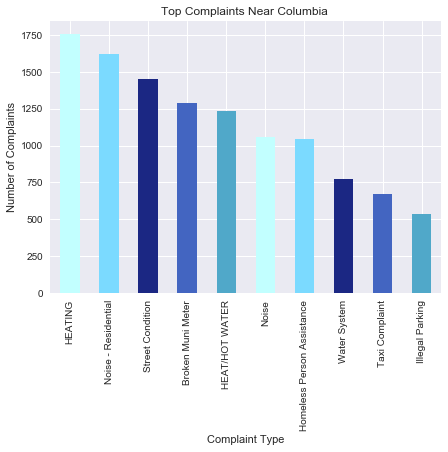

In [4]:
group_compliant = df2.groupby('complaint_type')
colors_Columbia = ['#c2ffff','#7bdaff','#1b2783','#4365c1','#50a8c9']
group = group_compliant.size().order(ascending=False)[:10] 
group.plot(kind='bar',figsize = (7,5),color = colors_Columbia,)
plt.title('Top Complaints Near Columbia ')
plt.ylabel('Number of Complaints')
plt.xlabel('Complaint Type')

In [7]:
all_snippets = list()
for descriptor in df2['descriptor']:
    #print(descriptor)
    #name = business['name']
    #snippet = business['snippet_text']
     #id = business['id']
    if isinstance(descriptor,str):
        all_snippets.append(descriptor)


In [9]:
text=''
for snippet in all_snippets:
    text+=snippet
text

'E15 Illegal PosteringRodents/Insects/GarbageBeekeeping - Honeybees1 or 2Bare Hands in Contact w/ FoodRat SightingRat SightingCondition Attracting RodentsCondition Attracting RodentsSigns of RodentsRat SightingChemical Vapors/Gases/OdorsPigeon OdorRodents/Insects/Garbage1 or 21 or 2Inadequate or No HeatSmoking ViolationRat SightingFood ContaminatedRat Sighting1 or 2Food ContaminatedDishwashing/UtensilsDust from ConstructionNo Status CallNo Status CallStatus CallNo Status CallHEATHEATFLOORWALLHEATVERMINGARBAGE/RECYCLING STORAGEMOLDWALLENTIRE BUILDINGVERMINHEATWALLFLOORTOILETFLOORWATER SUPPLYWATER-LEAKSENTIRE BUILDINGHEAT-PLANTHEATHEATHEATHEATHEATHEATHEATHEATWALLSHEATHEATHEATWINDOW FRAMEHEATHEATHEATHEATCERAMIC-TILECEILINGCEILINGSTEAM PIPE/RISERSEWERHEATWINDOW GUARDSDOORSENTIRE BUILDINGCEILINGENTIRE BUILDINGENTIRE BUILDINGENTIRE BUILDINGHEATENTIRE BUILDINGENTIRE BUILDINGENTIRE BUILDINGWALLENTIRE BUILDINGENTIRE BUILDINGENTIRE BUILDINGHEATHEATHEATMOLDAPARTMENT ONLYHEATVERMINWATER-LEAKSHEATW

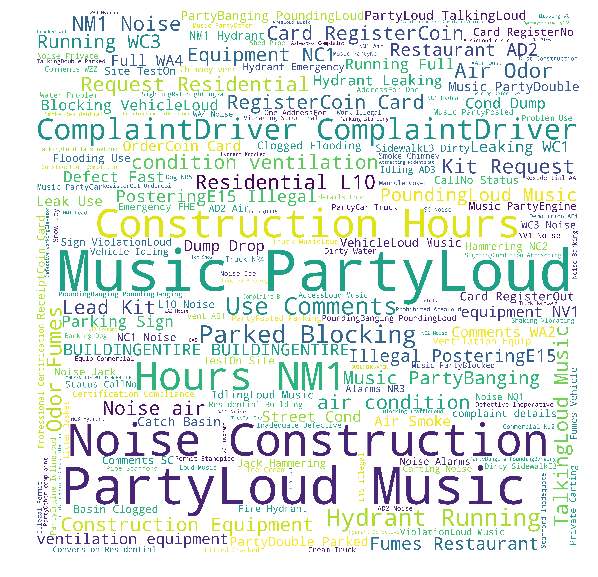

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=6000,height=6000).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [5]:
boolv = list()
for i in range(len(df2['descriptor'])):
    if isinstance(df2['descriptor'][i],str):       
        if 'Party' in df2['descriptor'][i] or 'party' in df2['descriptor'][i]:
            result = True
            boolv.append(result)
        else:
            result = False
            boolv.append(result)
    else:
        result = False
        boolv.append(result)
len(boolv)           

20767

In [6]:
party = df2[boolv]

In [7]:
party['weekday'] = party.created_date.dt.weekday

/Users/apple/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [8]:
party['hour'] = party.created_date.dt.hour

/Users/apple/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


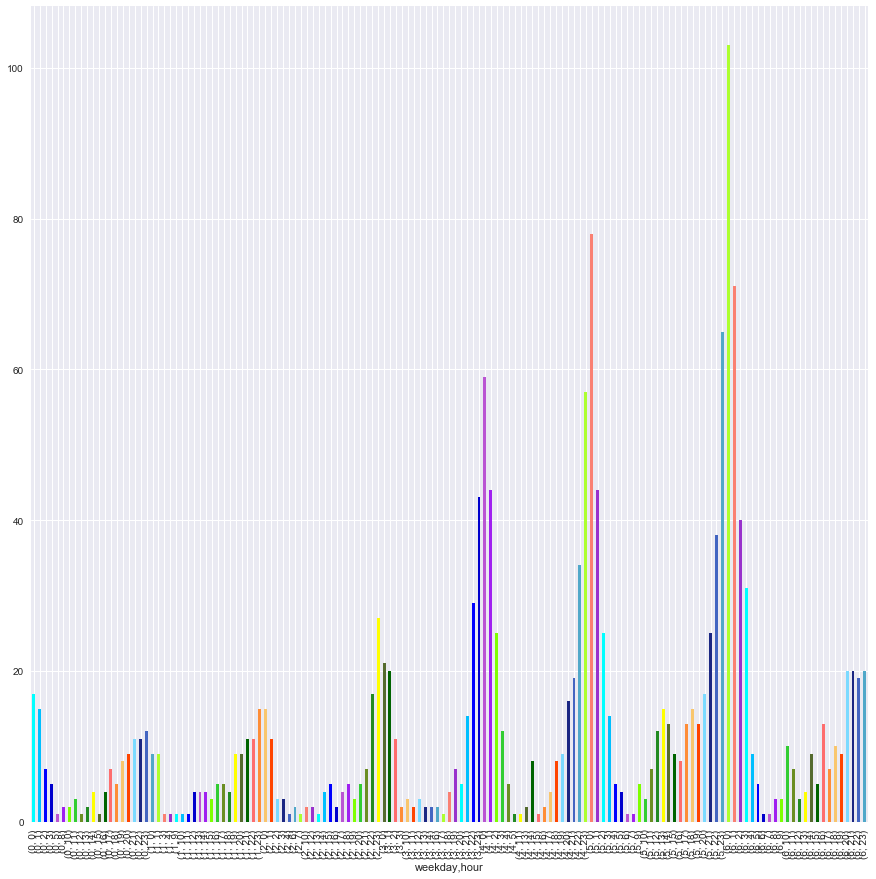

In [33]:
colors_24hrday = ['#00ffff','#00bfff','#0000ff','#0000cd','#ba55d3',
                  '#a020f0','#7fff00','#32cd32','#6b8e23','#228b22',
                  '#ffff00','#556b2f','#006400','#fe6d6d','#fe8d37',
                  '#f9c66d','#ff4500','#7bdaff','#1b2783','#4365c1',
                  '#50a8c9','#adff2f','#fa8072','#9932cc']

party.groupby(['weekday','hour']).size().plot(kind = 'bar',figsize=(15,15),color=colors_24hrday)


In [13]:
party_new = party[party['weekday']>2]

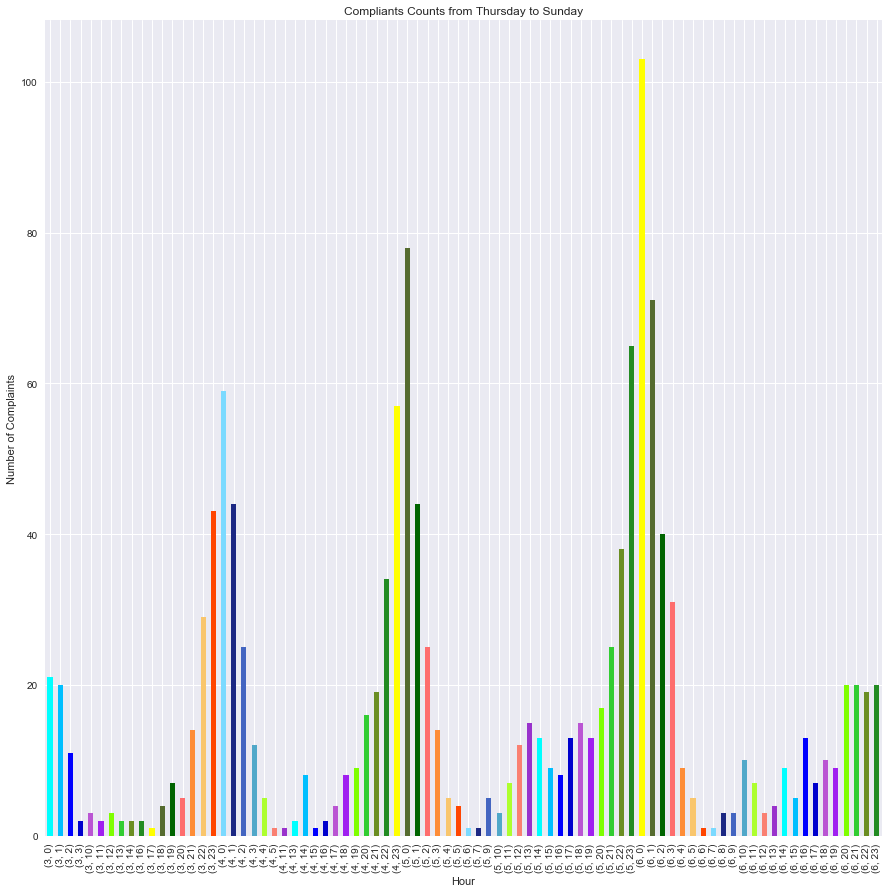

In [34]:
party_new.groupby(['weekday','hour']).size().plot(kind = 'bar',figsize=(15,15),color=colors_24hrday)
plt.title('Compliants Counts from Thursday to Sunday')
plt.ylabel('Number of Complaints')
plt.xlabel('Hour')

In [16]:
boolv = list()
for i in range(len(df2['descriptor'])):
    if isinstance(df2['descriptor'][i],str):       
        if df2['complaint_type'][i]=='HEATING'\
        or df2['complaint_type'][i]=='HEAT/HOT WATER'\
        or df2['complaint_type'][i]=='Water System':
            result = True
            boolv.append(result)
        else:
            result = False
            boolv.append(result)
    else:
        boolv.append(False)
len(boolv) 

20767

In [17]:
utility = df2[boolv]

In [18]:
utility['created_date']=pd.to_datetime(utility["created_date"] )

/Users/apple/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [19]:
utility['number_week'] = utility['created_date'].apply(lambda x: x.isocalendar()[1])

/Users/apple/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


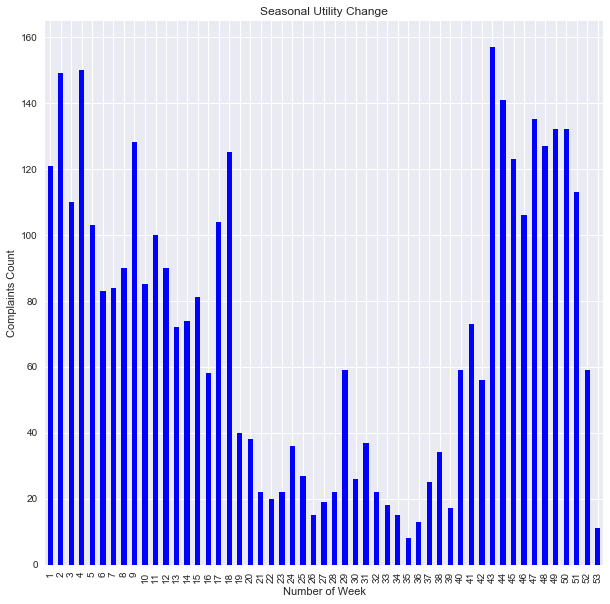

In [37]:
utility.groupby('number_week').size().plot(kind = 'bar',figsize=(10,10),color='#0000ff')
plt.title('Seasonal Utility Change')
plt.xlabel('Number of Week')
plt.ylabel("Complaints Count")

In [39]:
homeless = df2[df2['complaint_type']== 'Homeless Person Assistance']
len(homeless)

1047

/Users/apple/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/apple/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


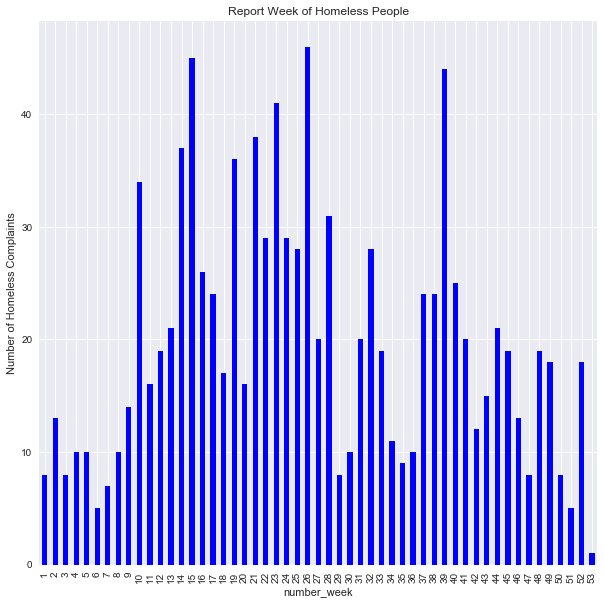

In [41]:
homeless['created_date']=pd.to_datetime(homeless["created_date"] )
homeless['number_week'] = homeless['created_date'].apply(lambda x: x.isocalendar()[1])
homeless.groupby('number_week').size().plot(kind = 'bar',figsize=(10,10),color='#0000ff')
plt.title('Report Week of Homeless People')
plt.ylabel('Number of Homeless Complaints')

/Users/apple/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


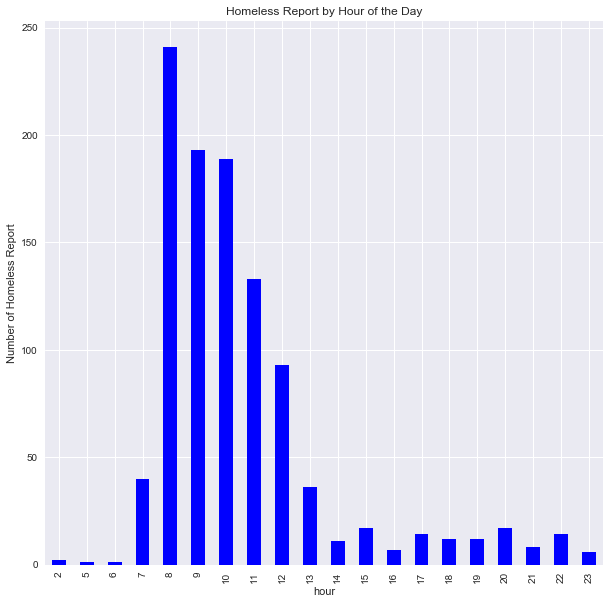

In [26]:
homeless['hour'] = homeless.created_date.dt.hour
homeless.groupby('hour').size().plot(kind = 'bar',figsize=(10,10),color = '#0000ff')
plt.title('Homeless Report by Hour of the Day')
plt.ylabel('Number of Homeless Report')